(1797, 64)


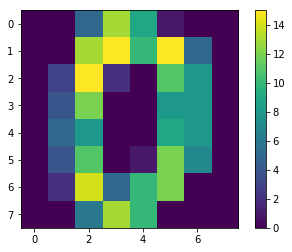

In [6]:
from __future__ import print_function
import numpy as np
import gzip
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from skimage import exposure
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [7]:
def load_data(path):
  dirname = os.path.join('datasets', 'kNN')
  if (path == None):
      path = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/'

  files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
  ]

  paths = []
  for fname in files:
    paths.append(os.path.join(path, fname))

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data(path="C:/Users/huang/mnist")

#x_train = x_train / 255.0
#x_test = x_test / 255.0

x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

print(x_train.shape)

(50000, 784)


In [14]:
#kVals = range(1, 30, 2)
#accuracies = []

k = 5
#for k in kVals:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train[:2000], y_train[:2000])
score = model.score(x_val[:2000], y_val[:2000])
print("k=%d, accuracy=%.2f%%" % (k, score * 100))
#accuracies.append(score)
    
#print(accuracies)

k=5, accuracy=90.05%


In [ ]:
prediction = model.predict(x_test)